## Jacob Vander Sanden
## Web Scraping Project - Part 4: Visiualizations
## 11/13/2024

In [2]:
# imports 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# open excel with data 
combined_data = pd.read_csv('combined_data.csv')

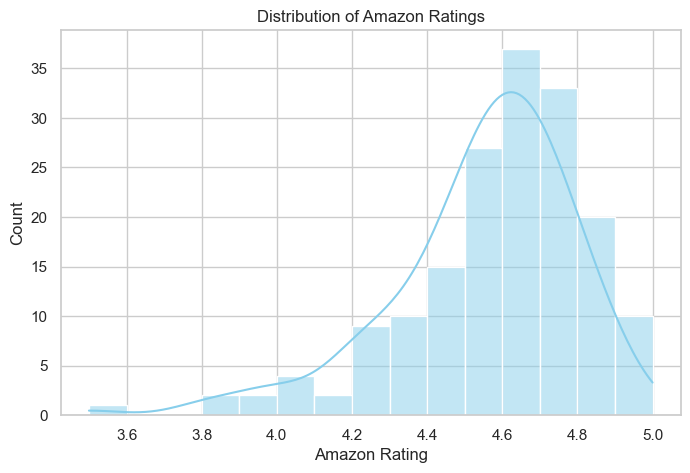

In [4]:
# Distributuon of Amazon Ratings
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of Amazon Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data=combined_data, x='amazon_rating', bins=15, kde=True, color="skyblue")
plt.title("Distribution of Amazon Ratings")
plt.xlabel("Amazon Rating")
plt.ylabel("Count")

# Save graph  
plt.savefig('distribution_amazon_ratings.jpeg')

plt.show()

C:\Users\jake8\AppData\Local\Temp\ipykernel_25272\292027844.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


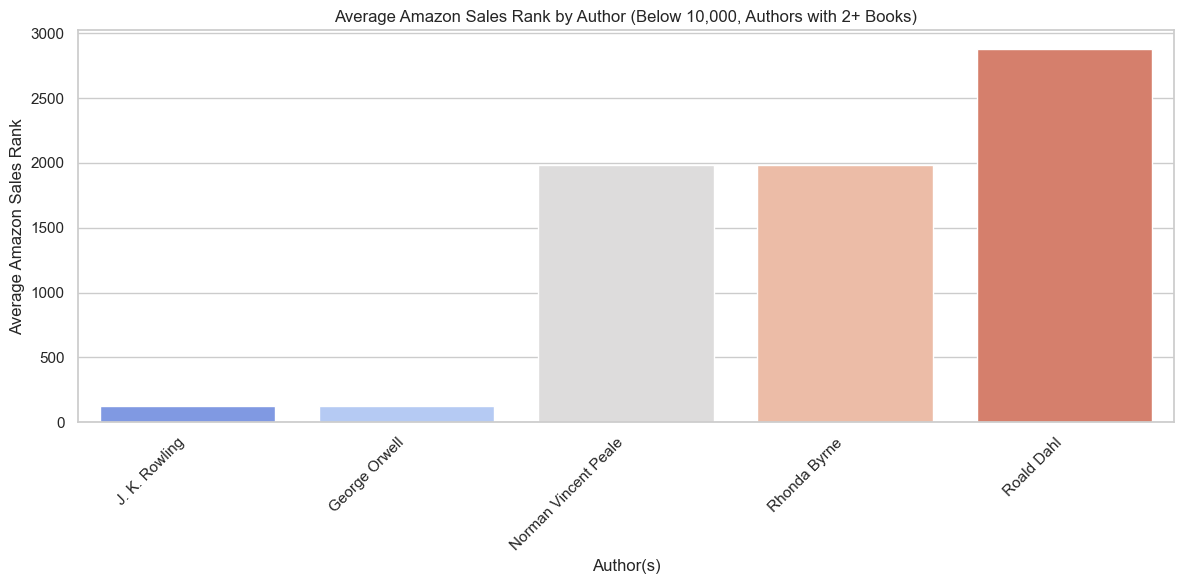

In [5]:
# Average Amazon sales rank by authors of at least 2 books
# Filter authors with at least 2 books
author_group = combined_data.groupby('author(s)').filter(lambda x: len(x) >= 2)

# Calculate the average Amazon sales rank for each author
author_avg_sales_rank = (
    author_group.groupby('author(s)')['amazon_sales_rank']
    .mean()
    .reset_index()
)

# Filter authors with an average sales rank below 10,000
author_avg_sales_rank = author_avg_sales_rank[author_avg_sales_rank['amazon_sales_rank'] < 10000]

# Sort the data for visualization
author_avg_sales_rank = author_avg_sales_rank.sort_values(by='amazon_sales_rank', ascending=True)

# Plot the average sales rank by author
plt.figure(figsize=(12, 6))
sns.barplot(
    data=author_avg_sales_rank,
    x='author(s)',
    y='amazon_sales_rank',
    palette="coolwarm"
)

# Add plot details
plt.title("Average Amazon Sales Rank by Author (Below 10,000, Authors with 2+ Books)")
plt.xlabel("Author(s)")
plt.ylabel("Average Amazon Sales Rank")
plt.xticks(rotation=45, ha='right')

# Adjust layout and display
plt.tight_layout()

# Save graph  
plt.savefig('authors.jpeg')

plt.show()

C:\Users\jake8\AppData\Local\Temp\ipykernel_25272\316970427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


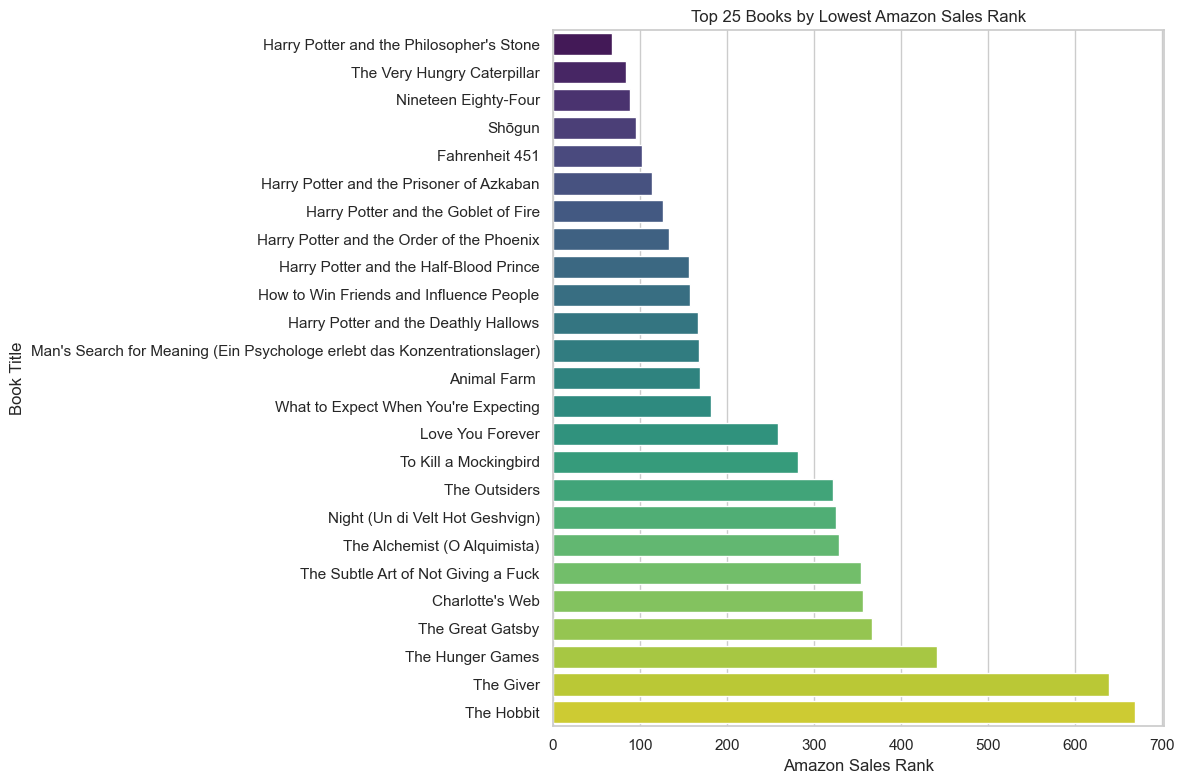

In [6]:
# Top 25 books by lowest sales rank 
# Sort the data by amazon_sales_rank (ascending) and select the top 25 books
top_25_books = combined_data.sort_values(by='amazon_sales_rank', ascending=True).head(25)

# Plot the top 25 books by lowest sales rank
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_25_books,
    x='amazon_sales_rank',
    y='book',
    palette="viridis"
)

# Add plot details
plt.title("Top 25 Books by Lowest Amazon Sales Rank")
plt.xlabel("Amazon Sales Rank")
plt.ylabel("Book Title")

# Display the plot
plt.tight_layout()

# Save graph  
plt.savefig('top25books.jpeg')

plt.show()

C:\Users\jake8\AppData\Local\Temp\ipykernel_25272\3618668697.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_data.groupby('year_bin')['amazon_sales_rank']
C:\Users\jake8\AppData\Local\Temp\ipykernel_25272\3618668697.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


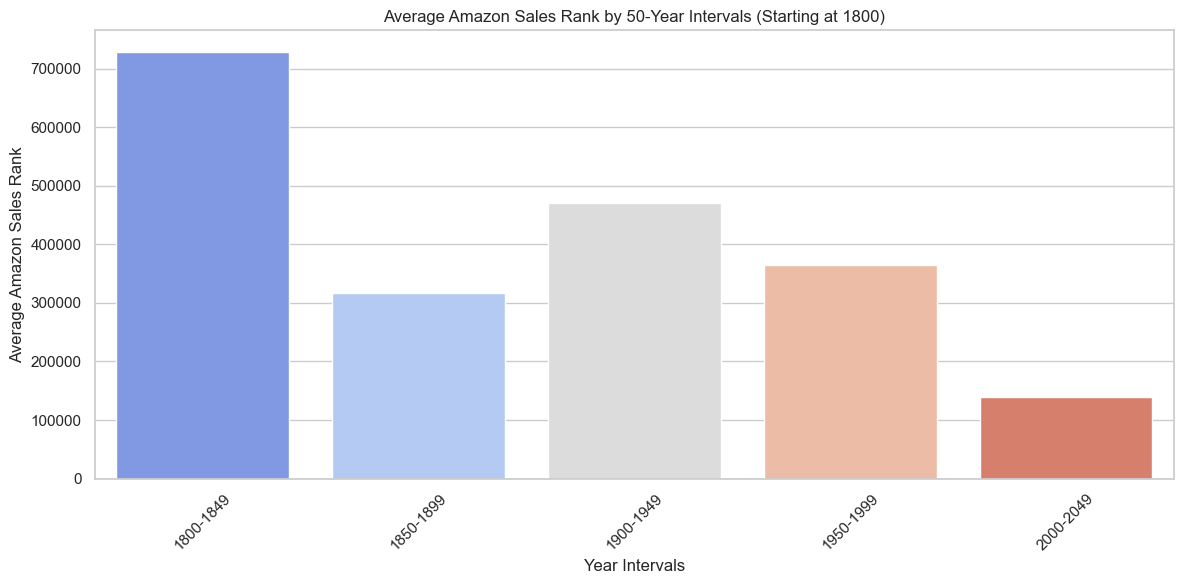

In [7]:
# Create bins for 50-year intervals starting from 1800
combined_data['year_bin'] = pd.cut(
    combined_data['first_published'], 
    bins=list(range(1800, 2100, 50)),  # Start at 1800, end at 2100, step of 50 years
    right=False,  # Include the left edge, exclude the right edge
    labels=[f"{start}-{start+49}" for start in range(1800, 2050, 50)]  # Label the bins
)

# Group by the 50-year intervals and calculate the average sales rank
avg_sales_rank_by_year_bin = (
    combined_data.groupby('year_bin')['amazon_sales_rank']
    .mean()
    .reset_index()
)

# Plot the average sales rank by 50-year intervals
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_sales_rank_by_year_bin,
    x='year_bin',
    y='amazon_sales_rank',
    palette='coolwarm'
)

# Add plot details
plt.title("Average Amazon Sales Rank by 50-Year Intervals (Starting at 1800)")
plt.xlabel("Year Intervals")
plt.ylabel("Average Amazon Sales Rank")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()

# Save graph  
plt.savefig('salesrankby50.jpeg')

plt.show()

C:\Users\jake8\AppData\Local\Temp\ipykernel_25272\1120913929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


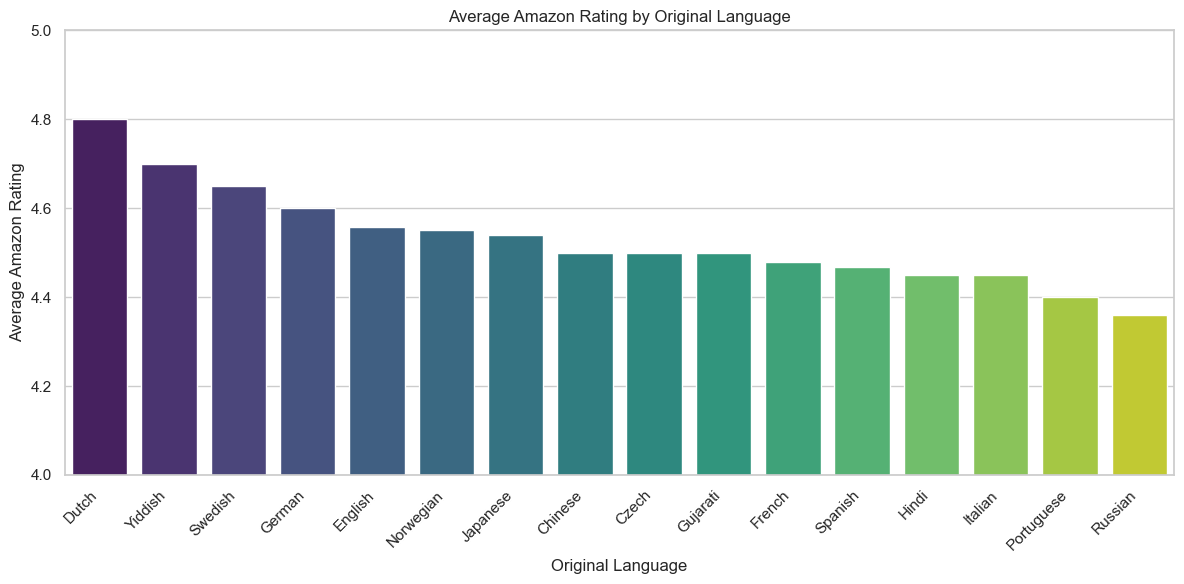

In [19]:
# Create the bar plot for language vs average Amazon rating with a y-axis limit between 4 and 5
plt.figure(figsize=(12, 6))
sns.barplot(
    data=language_avg_rating,
    x='original_language',
    y='amazon_rating',
    palette='viridis'
)

# Set the y-axis limits
plt.ylim(4, 5)

# Add plot details
plt.title("Average Amazon Rating by Original Language")
plt.xlabel("Original Language")
plt.ylabel("Average Amazon Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()

# Save graph  
plt.savefig('language.jpeg')

plt.show()